In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [2]:
data0=pd.read_csv(r'M:/critical/imputed.csv') #this is the data with all values imputed from statsmodels

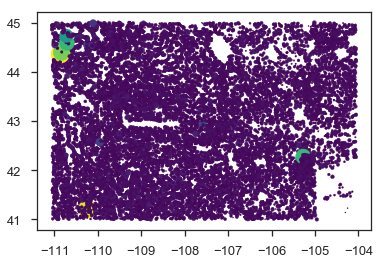

In [3]:
plt.scatter(data0['longitude'], data0['latitude'], c=data0['w_ppm'], cmap='viridis', s=data0['w_ppm']) #visualize it

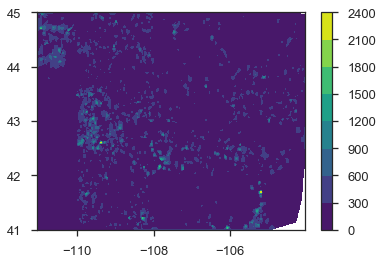

In [4]:
#this just creates a grid to contour and visualize the data
from scipy.interpolate import griddata
import matplotlib
xvalues=np.arange(np.min(data0['longitude']),np.max(data0['longitude'].values),0.01)
yvalues=np.arange(np.min(data0['latitude']),np.max(data0['latitude'].values),0.001)

Xi, Yi=np.meshgrid(xvalues,yvalues)
points=list(zip(data0['longitude'], data0['latitude']))
values=data0['zr_ppm']

grid_z2 = griddata(points, values, (Xi, Yi), method='linear')
plt.contourf(Xi, Yi, grid_z2, cmap='viridis')
plt.colorbar()


In [5]:
#this section reads the original data and selects the data columns and then fills the < values with random values between 0 and
#the detection limit (defined by - sign in front of a int)
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

            
filled=nure.fillna(0)


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


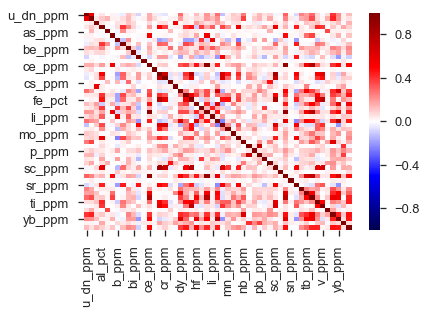

In [6]:
sns.heatmap(data0[dataColumns].corr(), cmap='seismic', vmin=-1, vmax=1) #correlation of variables with imputed data

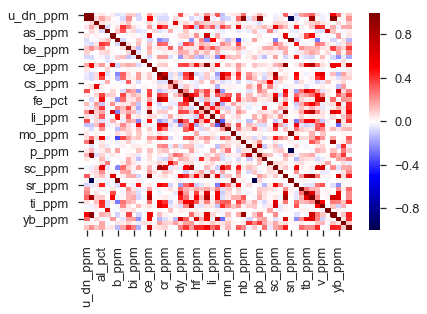

In [7]:
sns.heatmap(nure[dataColumns].corr(), vmin=-1, vmax=1, cmap='seismic') #correlation of variables without imputed data

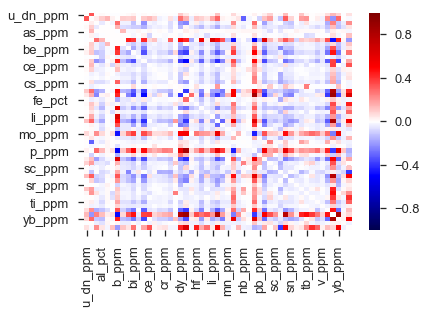

In [8]:
sns.heatmap(data0[dataColumns].corr()-nure[dataColumns].fillna(0).corr(),vmin=-1, vmax=1, cmap='seismic') #correlation of diffs

In [9]:
#this creates two DF's called imputed and original data, it then compares the distribution of the variables using a 2 sample KS
#test and records the p-values for all variables
from scipy import stats
p_values=[]
for i in range(len(dataColumns)):
    imputedData=data0[dataColumns].iloc[0:,i].drop(nure[dataColumns].iloc[0:,i].dropna().index)
    originalData=nure[dataColumns].iloc[0:,i].dropna()
    p_values.append(stats.ks_2samp(imputedData, originalData)[1])


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4750: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4756: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid val

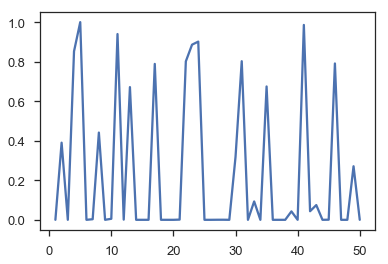

In [10]:
plt.plot(p_values) #plot the 2 sample KS test p-values

In [13]:
p_values=[]

for j in range(len(dataColumns)):
    columnS=j
    imputedData=pd.DataFrame()
    for i in range(40):
        it1=pd.read_csv(r'M:\critical\imputations\data'+str(i)+'.csv')
        imputedData[str(i)]=it1[dataColumns].iloc[0:,columnS].drop(nure[dataColumns].iloc[0:,columnS].dropna().index).values
    originalData=nure[dataColumns].iloc[0:,columnS].dropna()
    p_values.append(stats.ks_2samp(imputedData.values.flatten(), originalData)[1])


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4750: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4756: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid val

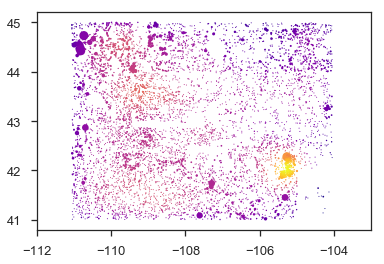

In [37]:
#plt.scatter(nure['longitude'], nure['latitude'], s=nure['co_ppm'])
from scipy.stats import gaussian_kde
'''
smooths the latitude and longitude with a gaussian kernel that makes a heat map
'''


In [187]:
for i in range(len(dataColumns)):
    originalData=nure[dataColumns].iloc[0:,i].dropna()
    plt.scatter(nure['longitude'], nure['latitude'], c=nure[dataColumns[i]], s=3, cmap='seismic')
    plt.title('Original Data '+str(dataColumns[i]))
    plt.colorbar()
    plt.savefig('M:/imputation maps/Original Data '+str(dataColumns[i])+'.jpg')
    plt.clf()



In [188]:
for i in range(len(dataColumns)):
    plt.scatter(data0['longitude'], data0['latitude'], c=data0[dataColumns[i]], s=3, cmap='seismic')
    plt.title('Imputed Data '+str(dataColumns[i]))
    plt.colorbar()
    plt.savefig('M:/imputation maps/Imputed Data '+str(dataColumns[i])+'.jpg')
    plt.clf()


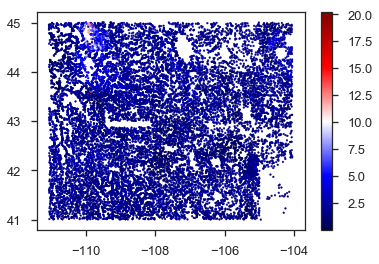

In [183]:
plt.scatter(nure['longitude'], nure['latitude'], c=np.std(nure[dataColumns[0]])/nure[dataColumns[0]], s=3, cmap='seismic')
plt.colorbar()


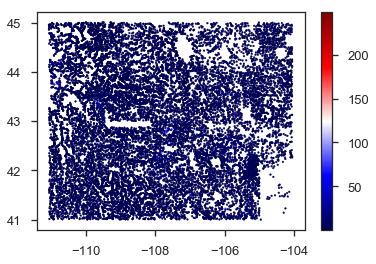

In [182]:
plt.scatter(nure['longitude'], nure['latitude'], c=nure[dataColumns[0]], s=3, cmap='seismic')
plt.colorbar()


In [11]:
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

disposable=nure

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [299]:
validationIndex=pd.DataFrame()
for i in range(len(dataColumns)):
    validationIndex=pd.DataFrame()
    disposable=nure
    tester=np.int(len(disposable[disposable[dataColumns[i]].notnull()==True].index)*.01)
    rands=np.random.choice(disposable[disposable[dataColumns[i]].notnull()==True].index,tester)
    disposable.at[rands, dataColumns[i]]=np.nan
    disposable.to_csv('M:/critical/validation sets/'+str(dataColumns[i])+'.csv')
    validationIndex[dataColumns[i]]=rands
    validationIndex.to_csv('M:/critical/validation sets/validation_index '+str(dataColumns[i])+'.csv')


In [12]:
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#read in generated data
#read in original data, this is the nure variable
#read in validation index
#use validation index to get generated data and add to new df
#use validation index to get original data and add to new df
imputedValues=[]
correctValues=[]
for i in range(len(dataColumns)):
    generated=pd.read_csv('M:/critical/validation sets/'+str(dataColumns[i])+'_generated.csv')
    indicies=pd.read_csv('M:/critical/validation sets/validation_index '+str(dataColumns[i])+'.csv')
    imputedValues.append(generated.loc[indicies.iloc[0:,1].values][dataColumns[i]])
    correctValues.append(nure.loc[indicies.iloc[0:,1].values][dataColumns[i]].values)

Text(0,0.5,'Actual Values')

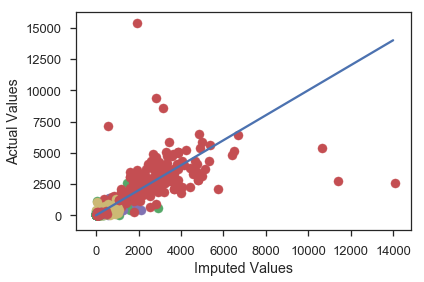

In [14]:
for i in range(len(dataColumns)):
    plt.scatter(imputedValues[i],correctValues[i])
plt.plot(range(14000))
plt.xlabel('Imputed Values')
plt.ylabel('Actual Values')

In [15]:
from sklearn.metrics import mean_absolute_error
mae=[]
for i in range(len(dataColumns)):
    mae.append(mean_absolute_error(correctValues[i], imputedValues[i].values))


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

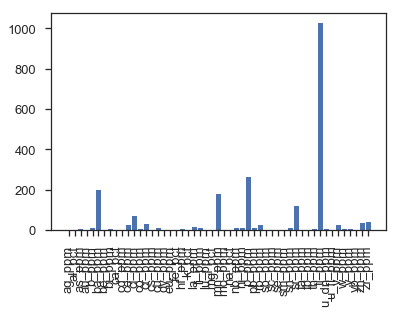

In [16]:
plt.bar(dataColumns, mae)
plt.xticks(rotation=90)


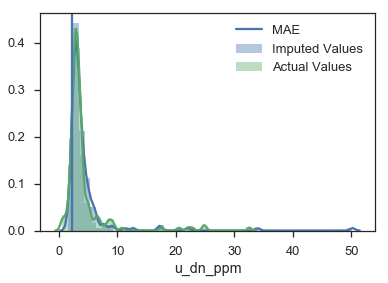

In [17]:
sns.distplot(imputedValues[0], label='Imputed Values')
sns.distplot(correctValues[0], label= 'Actual Values')
plt.axvline(mae[0], label='MAE')
plt.legend()

In [144]:
for i in range(len(dataColumns)):
    plt.scatter(imputedValues[i], correctValues[i])
    plt.plot(range(np.int(np.max(imputedValues[i]))), c='k')
    plt.xlabel('Imputed Values')
    plt.ylabel('Actual Values')
    plt.title(str(dataColumns[i]))
    plt.savefig('M:/critical/validation_results/'+str(dataColumns[i])+' crossplot.jpg')
    plt.clf()
    

In [145]:
for i in range(len(dataColumns)):
    sns.distplot(imputedValues[i], label='Imputed Values')
    sns.distplot(correctValues[i], label= 'Actual Values')
    plt.axvline(mae[i], label='MAE')
    plt.legend()
    plt.title(str(dataColumns[i]))
    plt.savefig('M:/critical/validation_results/'+str(dataColumns[i])+' distributions.jpg')
    plt.clf()



C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [20]:
randomMae=[]
for i in range(len(dataColumns)):
    try:
        randoms=np.random.randint(0,np.ceil(np.max(nure[dataColumns[i]].dropna())),len(correctValues[i]))
    except:
        randoms=np.zeros(len(correctValues[5]))
    randomMae.append(mean_absolute_error(correctValues[i], randoms))

(0, 200)

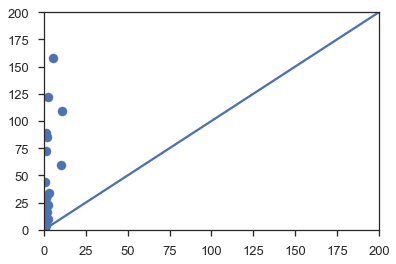

In [66]:
plt.scatter(mae, randomMae)
plt.plot(range(300))
plt.xlim(0,200)
plt.ylim(0,200)

In [67]:
means=[]
for i in range(len(dataColumns)):
    try:
        meanVals=np.full(len(correctValues[i]), np.mean(nure[dataColumns[i]].dropna()))
    except:
        meanVals=np.zeros(len(correctValues[i]))
    means.append(mean_absolute_error(correctValues[i], meanVals))

(0, 200)

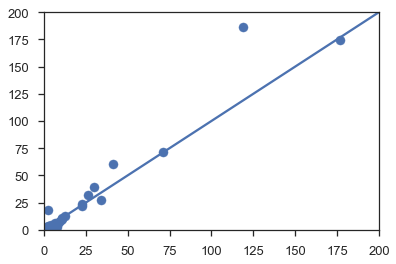

In [69]:
plt.scatter(mae, means)
plt.plot(range(300))
plt.xlim(0,200)
plt.ylim(0,200)

In [44]:
differences=[]
for i in range(len(mae)):
    differences.append(mae[i]-randomMae[i])
sum(differences)

-90198.711965314578

In [25]:
from sklearn.metrics import mean_squared_error

In [59]:
meansquared=[]
for i in range(len(dataColumns)):
    try:
        meanVals=np.full(len(correctValues[i]), np.mean(nure[dataColumns[i]].dropna()))
    except:
        meanVals=np.zeros(len(correctValues[i]))
    meansquared.append(np.sqrt(mean_squared_error(correctValues[i], meanVals)))

In [60]:
imputedMSE=[]
for i in range(len(dataColumns)):
    imputedMSE.append(np.sqrt(mean_squared_error(correctValues[i], imputedValues[i].values)))


(0, 200)

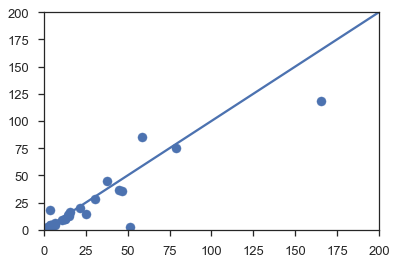

In [70]:
plt.scatter(imputedMSE,meansquared)
plt.plot(range(5000))
plt.xlim(0,200)
plt.ylim(0,200)

In [62]:
differences=[]
for i in range(len(meansquared)):
    differences.append(imputedMSE[i]-meansquared[i])
sum(differences)

541.74124061376983